# Online Retail Store: Exploratory Data Analysis with Python

## Dataset Information
**File:** Online Retail.xlsx

**Contents:**
- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred


## Task 1: Load the Data

In [1]:
import pandas as pd

In [2]:
file_path = r"C:\Users\midhu\MIT-PGCP DSML\Portfolio Projects\Online Retail - Data Analysis\Online Retail.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2: Clean and Validate the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#Check for Missing Values:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- We can eliminate rows with missing descriptions, as 1,454 entries out of 541,908 do not have a description.
- The substantial count of absent customer IDs (135,080) indicates a noteworthy data quality concern. Instead of scrutinizing individual customer behaviors, it is advisable to concentrate on analyzing overarching trends and patterns. Treat customers without IDs as part of a collective anonymous segment.

In [6]:
df = df.dropna(subset=['Description'])  # Drop rows with missing values in 'Description'

In [7]:
# 1. Identify rows with missing customer IDs
missing_customer_ids = df['CustomerID'].isnull()

# 2. Create a label for anonymous customers (optional)
anonymous_customer_label = 'Anonymous Customer'

# 3. Replace missing customer IDs with the anonymous customer label
df.loc[missing_customer_ids, 'CustomerID'] = anonymous_customer_label

In [8]:
#Check for Missing Values:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#Identify Duplicate Data:
duplicates = df.duplicated()
print(duplicates.sum())  # Count the number of duplicate rows

5268


In [10]:
df = df.drop_duplicates() #Remove duplicates

In [11]:
#Identify Duplicate Data:
duplicates = df.duplicated()
print(duplicates.sum())  # Count the number of duplicate rows

0


In [12]:
# Convert the 'Country' column to category data type
df['Country'] = df['Country'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.2+ MB


In [14]:
import matplotlib.pyplot as plt

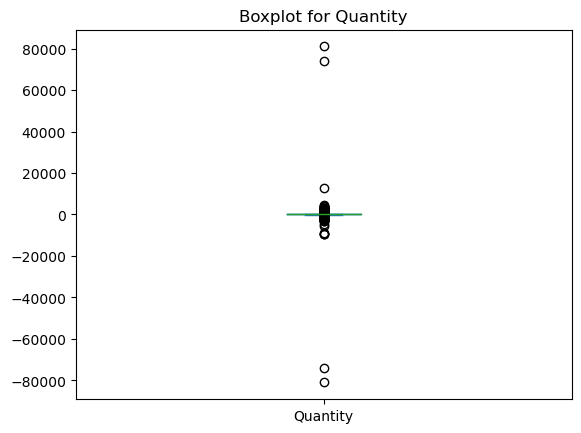

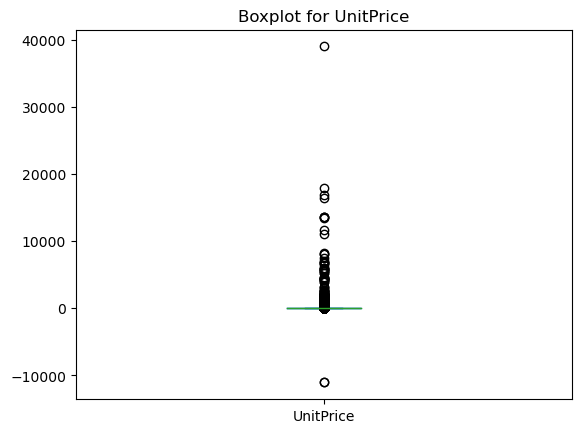

In [15]:
#Check for outliers in numerical columns
# Select the specific columns
numerical_cols = ['Quantity', 'UnitPrice']
df_subset = df[numerical_cols]
# Explore outliers with boxplots
for col in numerical_cols:
  df_subset[col].plot(kind='box')  # Leverage DataFrame.plot for boxplots
  plt.title(f"Boxplot for {col}")
  plt.show()

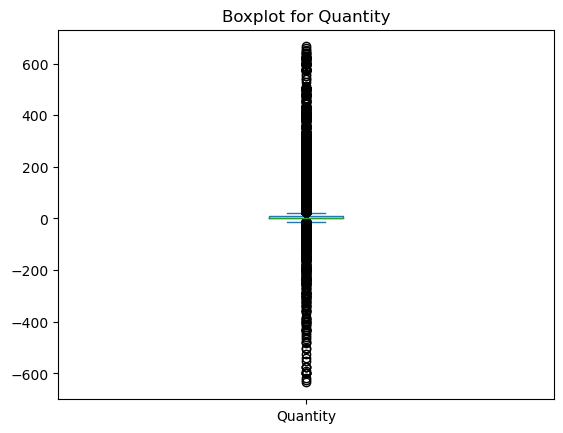

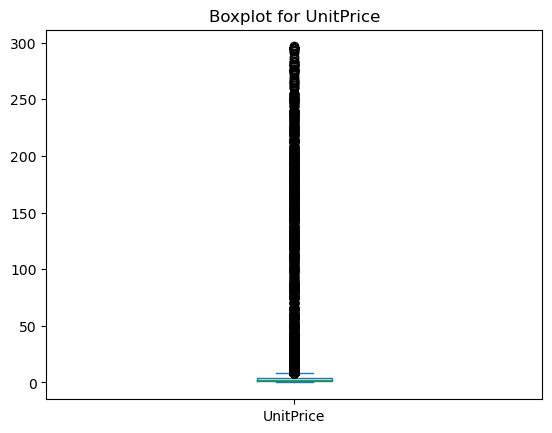

In [16]:
import numpy as np

from scipy import stats

z_threshold = 3.0  # Standard deviation threshold for outliers

# Create a copy of the DataFrame to avoid modifying the original
df_new = df.copy()

# Identify and optionally remove outliers using z-scores
for col in ['Quantity', 'UnitPrice']:
    z_scores = stats.zscore(df_new[col])
    outliers_mask = (np.abs(z_scores) > z_threshold)
    
    # Optionally remove outliers (comment out if not needed)
    df_new = df_new[~outliers_mask]

# Visualize boxplots for numerical columns after handling outliers
df_subset_new = df_new[['Quantity', 'UnitPrice']]
for col in ['Quantity', 'UnitPrice']:
    df_subset_new[col].plot(kind='box')
    plt.title(f"Boxplot for {col}")
    plt.show()

## Task 3: Explore the Data

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534500 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534500 non-null  object        
 1   StockCode    534500 non-null  object        
 2   Description  534500 non-null  object        
 3   Quantity     534500 non-null  int64         
 4   InvoiceDate  534500 non-null  datetime64[ns]
 5   UnitPrice    534500 non-null  float64       
 6   CustomerID   534500 non-null  object        
 7   Country      534500 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df_new.describe()

,Quantity,UnitPrice
count,534500.000000,534500.000000
mean,9.386840,3.542766
std,26.167656,7.549062
min,-635.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,666.000000,296.610000


In [19]:
description_table = df_new.describe().transpose()
print(description_table)

              count      mean        std    min   25%   50%    75%     max
Quantity   534500.0  9.386840  26.167656 -635.0  1.00  3.00  10.00  666.00
UnitPrice  534500.0  3.542766   7.549062    0.0  1.25  2.08   4.13  296.61


In [20]:
description_table.to_csv('description_table.csv')

In [21]:
# Count the number of entries with negative quantities
num_negative_entries = df_new[df_new['Quantity'] < 0].shape[0]

# Display the number of entries with negative quantities
print(f"Number of entries with negative quantities: {num_negative_entries}")

Number of entries with negative quantities: 9505


- Exclude Negative Quantities:Remove or exclude entries with negative quantities from your analysis since they are not relevant to goals of this analysis.

In [22]:
# Exclude entries with negative quantities
df_new = df_new[df_new['Quantity'] >= 0]

In [23]:
# Count the number of entries with negative quantities
num_negative_entries = df_new[df_new['Quantity'] < 0].shape[0]

# Display the number of entries with negative quantities
print(f"Number of entries with negative quantities: {num_negative_entries}")

Number of entries with negative quantities: 0


In [24]:
df_new.describe()

,Quantity,UnitPrice
count,524995.000000,524995.000000
mean,9.814360,3.492785
std,25.429061,7.121116
min,1.000000,0.000000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,666.000000,296.610000


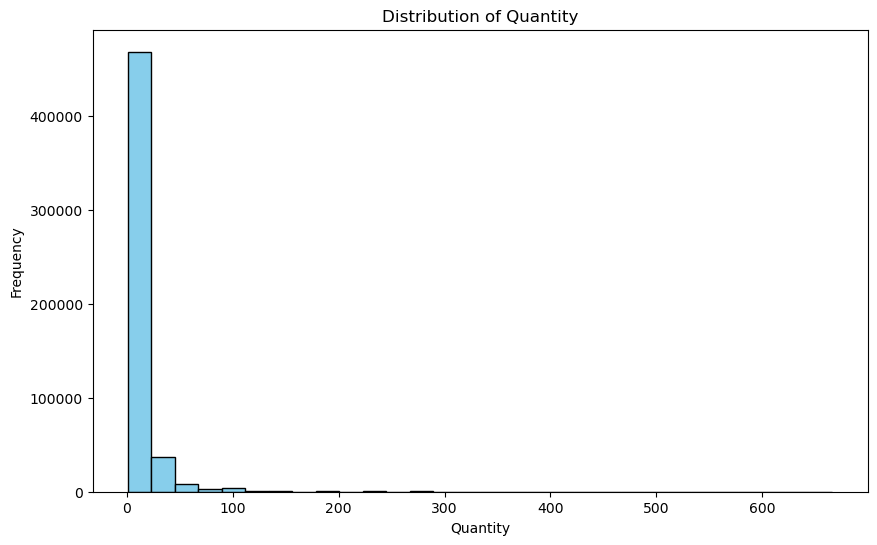

In [25]:
# Histogram for Quantity
plt.figure(figsize=(10, 6))
plt.hist(df_new['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

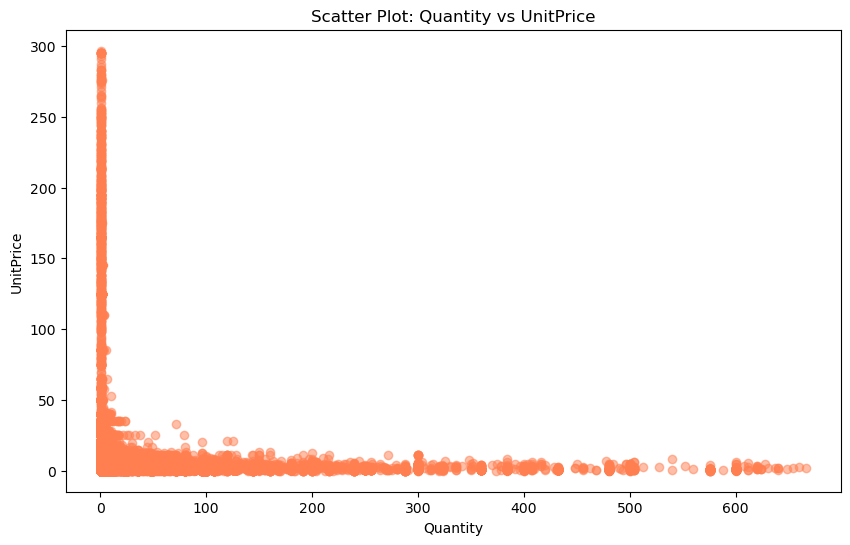

In [26]:
# Scatter plot for Quantity vs UnitPrice
plt.figure(figsize=(10, 6))
plt.scatter(df_new['Quantity'], df_new['UnitPrice'], color='coral', alpha=0.5)
plt.title('Scatter Plot: Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

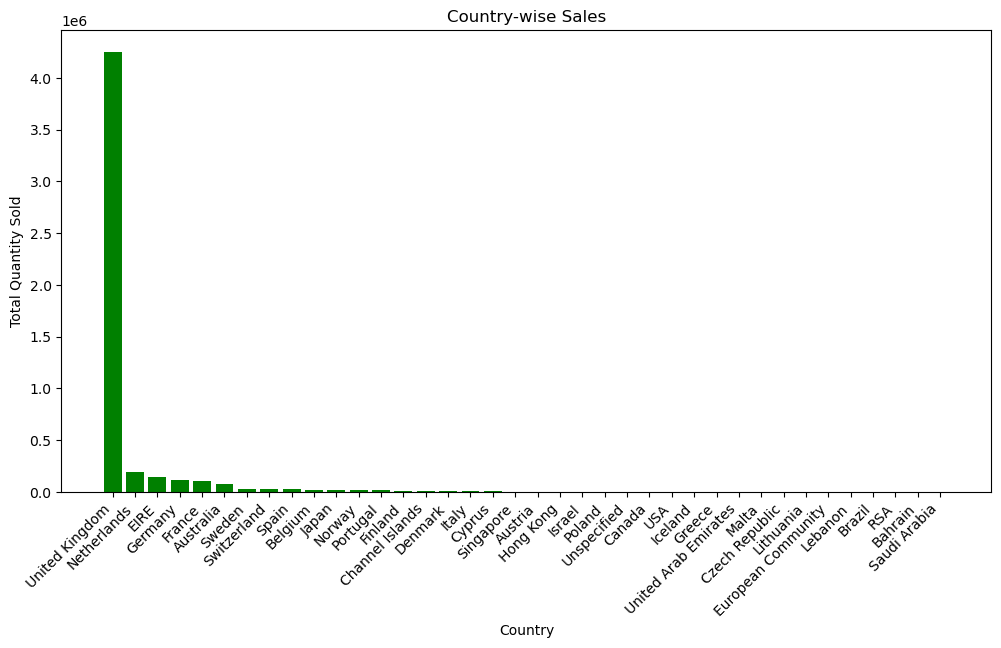

In [27]:
# Bar plot for Country-wise sales
plt.figure(figsize=(12, 6))
country_sales = df_new.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
plt.bar(country_sales.index, country_sales.values, color='green')
plt.title('Country-wise Sales')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# Extract month and day of the week from InvoiceDate
df_new['Month'] = df_new['InvoiceDate'].dt.month
df_new['DayOfWeek'] = df_new['InvoiceDate'].dt.dayofweek

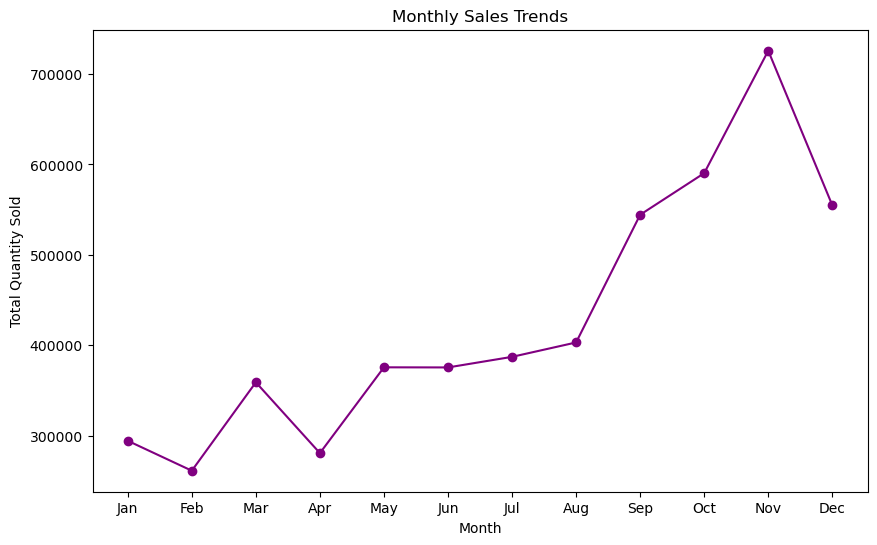

In [29]:
# Monthly sales trends
monthly_sales = df_new.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='purple')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

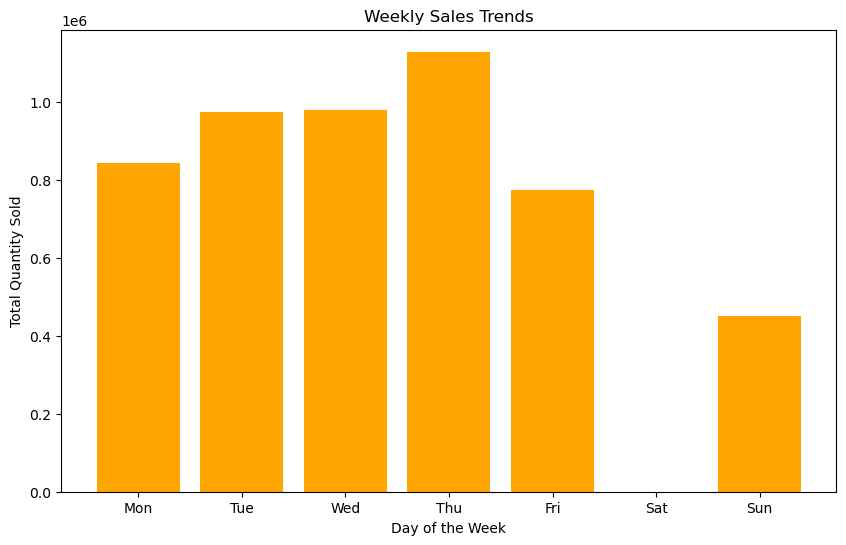

In [30]:
# Weekly sales trends
weekly_sales = df_new.groupby('DayOfWeek')['Quantity'].sum()
plt.figure(figsize=(10, 6))
plt.bar(weekly_sales.index, weekly_sales.values, color='orange')
plt.title('Weekly Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [31]:
weekly_sales

DayOfWeek
0     843287
1     973227
2     979566
3    1129012
4     775389
6     452009
Name: Quantity, dtype: int64

- The absence of an entry for Day 5, typically associated with Saturday, in this dataset doesn't necessarily indicate a holiday. It could be due to incomplete data or the online store not operating on Saturdays.

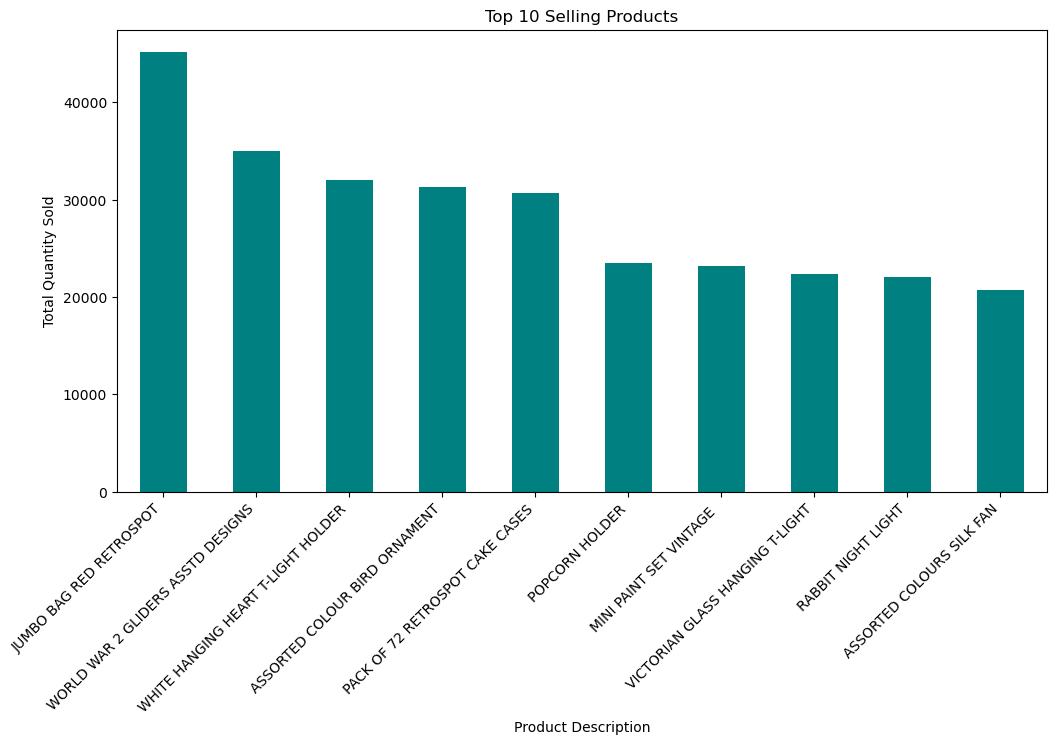

In [32]:
# Top-selling products
top_products = df_new.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='teal')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

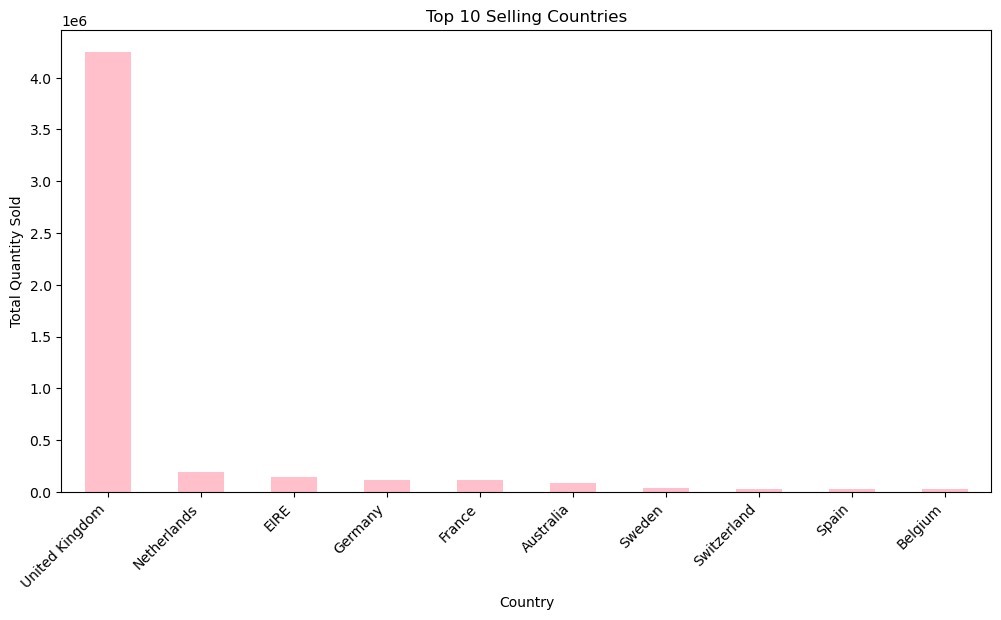

In [33]:
# Top-selling countries
top_countries = df_new.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='pink')
plt.title('Top 10 Selling Countries')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()